# Extrémy funkcí

Naimportujeme si knihovny potřebné pro následující příklady:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Hledání extrémů funkce jedné proměnné
- Pro ohraničení minima/maxima musíme znát hodnoty funkce ve třech bodech $a, b, c$
- Budeme se zabývat hledáním minima
- Nechť
$$
a < b < c \wedge f(a) > f(b) < f(c),
$$
pak existuje minimum funkce $f(x)$ na intervalu $(a,c)$.
- Ke zúženı́ intervalu ohraničujı́cı́ho minimum potřebujeme **čtvrtý** bod

### Metoda zlatého řezu
- Vzdálenost čtvrtého bodu od krajů je v poměru [zlatého řezu](https://www.mathsisfun.com/numbers/nature-golden-ratio-fibonacci.html): $d=a + \dfrac{3-\sqrt{5}}{2}(c-a)$

<div class="alert alert-block alert-warning"><b>Cvičení 08.01: </b> Najděte minimum funkce $f(x)=-\sin(x)$ metodou zlatého řezu.</div>

In [2]:
#
# priklad minimalizace funkce jedne promenne metodou zlateho rezu

# zadejme si funkci -sin(x)
def f(x):
    return -np.sin(x)

# na zacatku nastavme uvodni body metody a < c , minimum by melo byt nekde
# kolem pi/2=1.5708, a bude mezi temito dvema body, bod b budeme dopocitavat
a = 0
c = np.pi

# nastavme presnost, se kterou chceme nalezt minimum
presnost = 1e-3

# ulozime si zlaty rez
zlatyRez = (3-np.sqrt(5))/2 # ~0.38

# napocteme prvni nastrel bodu b
b = a+zlatyRez*(c-a)

# hledani probiha v cyklu
while True:
    if (c-a) < presnost: # skoncime, pokud je minimum urceno dostatecne presne
        break
    # DOPLNTE
    # nyni mame body a<b<c, pokud bod b je v leve casti intervalu < a,c >,
    # ponechame ho tam, a dopocitame bod d
    # pokud je bod b v prave casti intervalu < a,c > (tzn vznikl v prubehu
    # iteraci), preznacime ho na d a dopocteme polohu bodu b

    # nyni mame a<b<d<c, zjistime ve kterem intervalu je minimum
    # pokud je minimum v intervalu < a,d > (ten navic obsahuje bod b),
    # presuneme pravy konec intervalu do bodu d, bod b nechame na svem miste
    # pokud je minimum je v intervalu < b,c > (ten navic obsahuje bod d),        
    # bod d se stane novym bodem b
    # a levy okraj presuneme do puvodniho bodu b    

print('Minimum je v intervalu <',a,',',c,'>')


KeyboardInterrupt: 

### Metoda parabolické interpolace
- Odhad minima je určen vztahem:
$$
d = b-\dfrac{1}{2}\dfrac{(b-a)^{2}[f(b)-f(c)]-(b-c)^{2}\left[f(b)-f(a)\right]}{(b-a)\left[f(b)-f(c)\right]-(b-c)\left[f(b)-f(a)\right]}
$$

<div class="alert alert-block alert-warning"><b>Cvičení 08.02: </b> Najděte minimum funkce $f(x)=-\sin(x)$ metodou parabolické interpolace.</div>

In [ ]:
#
#
# hledani minima parabolickou interpolaci

# zadejme si funkci -sin(x)
def f(x):
    return -np.sin(x)

# na zacatku nastavme uvodni body metody a < b < c , minimum by melo byt nekde
# kolem pi/2=1.5708
a = 0
b = 0.3
c = np.pi

# nastavme presnost, se kterou chceme nalezt minimum
presnost = 1e-3

# hledani probiha v cyklu
while True:
    if (c-a) < presnost: # skoncime, pokud je minimum urceno dostatecne presne
        break
    
    # z a,b,c odhadneme polohu d minima paraboly, kterou jsme prolozili body
    # a,b,c
    d = b-0.5*((b-a)**2*(f(b)-f(c))-(b-c)**2*(f(b)-f(a)))/((b-a)*(f(b)-f(c))-(b-c)*(f(b)-f(a)))
    
    # zjistime, zda nastala situace a < d < b < c nebo a < b < d < c, najdeme interval, na kterem
    # se nachazi minimum a zkratime interval, ktery toto minimum obsahuje
    # DOPLNTE

print('Minimum je v intervalu <',a,',',c,'>')

## Hledání extrémů funkce více proměnných

### Nelder-Mead (simplex) metoda
- Využívá (N + 1)-simplex v N-dimenzionálním prostoru
- Simplex posunujeme tak, aby ohraničil minimum
- Pak se zmenšuje, dokud není minimum známo s dostatečnou přesností
- [Animace](https://www.youtube.com/watch?v=KEGSLQ6TlBM)
- Postup při hledání minima funkce o dvou proměnných:
 1. Zajistíme, aby $f(W=\mathrm{Worst})>f(G=\mathrm{Good})>f(B=\mathrm{Best})$
 2. **Reflexe** vrcholu $W$ na $R$:
   1. $M=\dfrac{B+G}{2}$
   2. $R=M+(M-W)$
   3. Pokud $f(R)<f(W)$, přesuneme sem bod $W$
 3. **Expanze** vrocholu $R$:
   1. $R$ posuneme o $M-W$ do $E$
   2. Pokud $f(E)<f(R)$, přesuneme sem bod $W$
 4. Pokud nelze splnit kroky 2. a 3., provedeme **kontrakci**:
   1. Vytvoříme $C$ uprostřed úsečky $\lvert WM\rvert$
   2. Pokud $f(C)<f(W)$, přesuneme sem bod $W$
 5. Pokud nelze splnit krok 4., provedeme **zmenšení**:
   1. Vytvoříme $S$ uprostřed úsečky $\lvert WB\rvert$
   2. Bod $W$ přesuneme do $S$
   3. Bod $G$ přesuneme do $M$
        

<div class="alert alert-block alert-warning"><b>Cvičení 08.03: </b>Najděte minimum funkcí $f_{1}(x)=x^{2}+y^{2}$ a  $f_{2}(x)=100(x-y^{2})^{2}+(1-x)^{2}$ simplexovou metodou.</div>

Krok:  0
souradnice bodu =  [[  0.1 -15.2]
 [ 14.8   5.9]
 [  4.7  19. ]]
funkcni hodnoty bodu =  [[231.05]
 [253.85]
 [253.85]]
Krok:  1
souradnice bodu =  [[  6.075   7.175]
 [  0.1   -15.2  ]
 [ 14.8     5.9  ]]
funkcni hodnoty bodu =  [[88.38625]
 [88.38625]
 [88.38625]]
Krok:  2
souradnice bodu =  [[  8.94375   0.94375]
 [  6.075     7.175  ]
 [  0.1     -15.2    ]]
funkcni hodnoty bodu =  [[80.88132812]
 [80.88132812]
 [80.88132812]]
Krok:  3
souradnice bodu =  [[ 3.8046875 -5.5703125]
 [ 8.94375    0.94375  ]
 [ 6.075      7.175    ]]
funkcni hodnoty bodu =  [[45.50402832]
 [45.50402832]
 [45.50402832]]
Krok:  4
souradnice bodu =  [[ 6.22460938  2.43085938]
 [ 3.8046875  -5.5703125 ]
 [ 8.94375     0.94375   ]]
funkcni hodnoty bodu =  [[44.65483917]
 [44.65483917]
 [44.65483917]]
Krok:  5
souradnice bodu =  [[ 1.08554688 -4.08320312]
 [ 6.22460938  2.43085938]
 [ 3.8046875  -5.5703125 ]]
funkcni hodnoty bodu =  [[17.85095978]
 [17.85095978]
 [17.85095978]]
Krok:  6
souradnice bo

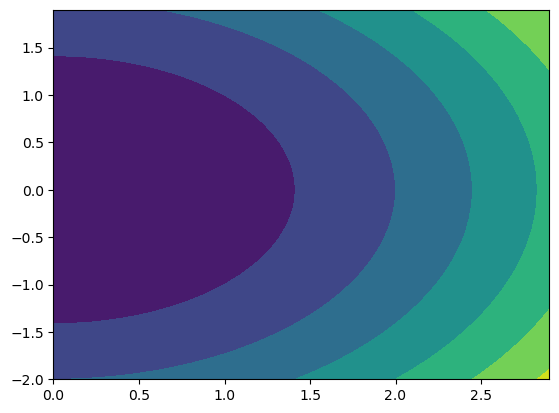

In [10]:
#
# Nelder-Mead

def f(x1,x2):
    return x1**2+x2**2
    #return 100*(x1-x2**2)**2+(1-x1)**2    


x1 = np.arange(0, 3, 0.1)
x2 = np.arange(-2, 2, 0.1)

xx1,xx2 = np.meshgrid(x1,x2);

z = xx1**2+xx2**2
#z = 100*(xx1-xx2**2)**2+(1-xx1)**2

h = plt.contourf(xx1,xx2,z)


alpha = 1 # koeficient zmeny velikosti pri reflexi
gamma = 2 # koeficient zvetseni
rho = 0.5 # koeficient zmenseni

c = np.zeros((2,1))

# 3 pocatecni body (ve 2D prostoru)
x = np.array([[0.1, -15.2], [4.7, 19], [14.8, 5.9]])
y = np.zeros((3,1))

# funkcni hodnoty v pocatecnich bodech
y[0] = f(x[0,0],x[0,1])
y[1] = f(x[1,0],x[1,1])
y[2] = f(x[2,0],x[2,1])

# volna pole pro ukladani mezivysledku
xt = np.zeros((3,1))
yt = np.zeros((3,1))
xc = np.zeros((3,1))
yc = np.zeros((3,1))
xe = np.zeros((3,1))

for k in range(100):
    # body chceme mit serazene y(0) < y(1) < y(2) (B < G < W)
    if y[2] < y[1]: # prohozeni
        x[1,0], x[2,0] = x[2,0], x[1,0]
        x[1,1], x[2,1] = x[2,1], x[1,1]
        y[1], y[2] = y[2], y[1]
    if y[1] < y[0]: #  prohozeni
        x[0,0], x[1,0] = x[1,0], x[0,0]
        x[0,1], x[1,1] = x[1,1], x[0,1]
        y[0], y[1] = y[1], y[0]
        if y[2] < y[1]: # prohozeni
            x[1,0], x[2,0] = x[2,0], x[1,0]
            x[1,1], x[2,1] = x[2,1], x[1,1]
            y[1], y[2] = y[2], y[1]
    
    # ve tretim bode (tj. bod W) je nejvyšší hodnota funkce z daných trech bodu = Worst
    # vypis hodnot
    print('Krok: ',k)
    print('souradnice bodu = ',x)
    print('funkcni hodnoty bodu = ',y)

    # vypocet x0 (c(i)) v polovine spojnice vsech bodu krome posledniho
    for i in range(2):
        c[i] = 0
        for j in range(2):
            c[i] = c[i] + x[j,i]/2

    # reflexe, ziskame souradnice reflektovaneho noveho bodu
    for i in range(2):
        xt[i] = c[i] + alpha*( c[i]-x[2,i] )

    yt = f(xt[0], xt[1])

    if yt<y[2]: # pokud je funkcni hodnota zrcadleneho bodu nizsi nez nas nejvyssi bod
        for i in range(2): # nahradime tento bod nove nalezenym bodem
            x[2,i] = xt[i]

        y[2] = yt
        if yt<y[0]:# pokud je bod nizsi, nez nas nejnizsi
            for i in range(2): # provedeme reflexi se zvetsenim s koeficientem gamma
                xe[i] = c[i] + gamma*( xt[i]-c[i] )
            ye = f(xe[0], xe[1])
            if ye<yt: # pokud je vysledek lepsi, nez samotna reflexe
                for i in range(2): # nahradime posledni bod novym
                    x[2,i] = xe[i]
                y[2] = ye


    if yt>y[1]: # pokud je ozrcadleny bod vetsi, nez nas prostredni
        for i in range(2): # provedeme zmenseni s koeficientem rho
            xc[i] = c[i]+rho*( x[2,i]-c[i] )
        yc = f(xc[0],xc[1])
        if yc<y[2]: # pokud je novy bod nizsi, nez nas nejvyssi
            for i in range(2): # vymenime je
                x[2,i] = xc[i]
            y[2] = yc
        else: # v opacnem pripade provedeme zmenseni ve vsech smerech (1,2) k minimu (0)
            for i in range(1,3): # zmensujeme smery 1 a 2, na minimum nesahame
                for j in range(2): # zmenseni (v puvodnich smerech) s koeficientem rho
                    x[i,j] = x[0,j] + rho*( x[i,j]-x[0,j] )
                y[i] = f( x[i,0], x[i,1] )
